![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Exercise 03 - Hearth Disease Classification </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/Exercises/Exercise03_Classification.ipynb)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})
# np.random.seed(1)

### Load the dataset:
https://www.kaggle.com/cherngs/heart-disease-cleveland-uci?select=heart_cleveland_upload.csv

In [3]:
dData = pd.read_csv('heart_cleveland_upload.csv')
dData

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


### Display target balance:

0    160
1    137
Name: condition, dtype: int64

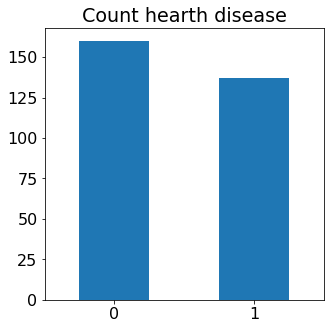

In [4]:
dData['condition'].value_counts().plot(kind='bar', figsize=(5, 5), title='Count hearth disease', rot=0)
dData['condition'].value_counts()

### Pairwise correlations

In [5]:
dCorr = dData.corr()
dCorr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.00,-0.09,0.11,0.29,0.20,0.13,0.15,-0.39,0.10,0.20,0.16,0.36,0.12,0.23
sex,-0.09,1.00,0.01,-0.07,-0.20,0.04,0.03,-0.06,0.14,0.11,0.03,0.09,0.37,0.28
cp,0.11,0.01,1.00,-0.04,0.07,-0.06,0.06,-0.34,0.38,0.20,0.15,0.24,0.27,0.41
trestbps,0.29,-0.07,-0.04,1.00,0.13,0.18,0.15,-0.05,0.07,0.19,0.12,0.10,0.13,0.15
chol,0.20,-0.20,0.07,0.13,1.00,0.01,0.17,-0.00,0.06,0.04,-0.01,0.12,0.02,0.08
fbs,0.13,0.04,-0.06,0.18,0.01,1.00,0.07,-0.01,-0.00,0.01,0.05,0.15,0.05,0.00
restecg,0.15,0.03,0.06,0.15,0.17,0.07,1.00,-0.07,0.08,0.11,0.14,0.13,0.01,0.17
thalach,-0.39,-0.06,-0.34,-0.05,-0.00,-0.01,-0.07,1.00,-0.38,-0.35,-0.39,-0.27,-0.26,-0.42
exang,0.10,0.14,0.38,0.07,0.06,-0.00,0.08,-0.38,1.00,0.29,0.25,0.15,0.32,0.42
oldpeak,0.20,0.11,0.20,0.19,0.04,0.01,0.11,-0.35,0.29,1.00,0.58,0.29,0.34,0.42


#### Columns full name (based on the data description):
(Try to understand the following code)

In [6]:
lFullName = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestECG', 'MaxHeartRateAchieved', 'ExerciseInducedAngina', 'StDepression', 'StSlope', 'NumMajorVessels', 'Thalassemia', 'Target']
space     = max(map(len, dData.columns))
for (shortName, fullName) in zip(dData.columns, lFullName):
    print(f'{shortName:{space}s} = {fullName}')

age       = Age
sex       = Sex
cp        = ChestPainType
trestbps  = RestingBloodPressure
chol      = Cholesterol
fbs       = FastingBloodSugar
restecg   = RestECG
thalach   = MaxHeartRateAchieved
exang     = ExerciseInducedAngina
oldpeak   = StDepression
slope     = StSlope
ca        = NumMajorVessels
thal      = Thalassemia
condition = Target


### Get data and normalization:

In [7]:
mX = dData.drop(columns='condition').values
vY = dData['condition'].values

mX.shape, vY.shape

((297, 13), (297,))

In [8]:
#-- Normalize data:
mX -= mX.mean(0)
mX /= mX.std(0)

### Basic classification:
Let us try several default classifiers

In [9]:
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, KFold

#-- Classifiers:
#-- You can set the hyper-parameters as well
lModels  = []
lModels += [(SVC                   (C=1), 'SVM'                )]
lModels += [(LogisticRegression    (),    'Logistic Regression')]
lModels += [(KNeighborsClassifier  (),    'KNN'                )]
lModels += [(DecisionTreeClassifier(),    'Tree'               )]


N = len(vY)
for (oClassifier, name) in lModels:
    vHatY    = cross_val_predict(oClassifier, mX, vY, cv=KFold(N))
    accuracy = np.mean(vY == vHatY)
    print(f'{name:19s} = {100*accuracy:2.2f}%')

SVM                 = 82.83%
Logistic Regression = 83.16%
KNN                 = 82.49%
Tree                = 70.37%


### Exercise A:
* Use `KNeighborsClassifier` and get above 84% leave-one-out cross validation accuracy.  
(Play with the hyper-parameters)

In [10]:
#-- Your solution
???

Object `?` not found.


### Meaningful categorical data:
(Based on the data description)

In [11]:
dData2         = dData.copy()
dData2.columns = lFullName
dData2

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRateAchieved,ExerciseInducedAngina,StDepression,StSlope,NumMajorVessels,Thalassemia,Target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [12]:
dData2.loc[dData2['Sex']                   == 0, 'Sex']                   = 'female'
dData2.loc[dData2['Sex']                   == 1, 'Sex']                   = 'male'
  
dData2.loc[dData2['ChestPainType']         == 0, 'ChestPainType']         = 'asymptomatic'
dData2.loc[dData2['ChestPainType']         == 1, 'ChestPainType']         = 'atypical angina'
dData2.loc[dData2['ChestPainType']         == 2, 'ChestPainType']         = 'non-anginal pain'
dData2.loc[dData2['ChestPainType']         == 3, 'ChestPainType']         = 'typical angina'

dData2.loc[dData2['FastingBloodSugar']     == 0, 'FastingBloodSugar']     = 'lower than 120mg/ml'
dData2.loc[dData2['FastingBloodSugar']     == 1, 'FastingBloodSugar']     = 'greater than 120mg/ml'

dData2.loc[dData2['RestECG']               == 0, 'RestECG']               = 'normal'
dData2.loc[dData2['RestECG']               == 1, 'RestECG']               = 'ST-T wave abnormality'
dData2.loc[dData2['RestECG']               == 2, 'RestECG']               = 'left ventricular hypertrophy'

dData2.loc[dData2['ExerciseInducedAngina'] == 0, 'ExerciseInducedAngina'] = 'no'
dData2.loc[dData2['ExerciseInducedAngina'] == 1, 'ExerciseInducedAngina'] = 'yes'

dData2.loc[dData2['StSlope']               == 0, 'StSlope']               = 'upsloping'
dData2.loc[dData2['StSlope']               == 1, 'StSlope']               = 'flat'
dData2.loc[dData2['StSlope']               == 2, 'StSlope']               = 'downsloping'

dData2.loc[dData2['Thalassemia']           == 0, 'Thalassemia']           = 'normal'
dData2.loc[dData2['Thalassemia']           == 1, 'Thalassemia']           = 'fixed defect'
dData2.loc[dData2['Thalassemia']           == 2, 'Thalassemia']           = 'reversable defect'

dData2.loc[dData2['Target']                == 0, 'Target']                = 'no heart disease'
dData2.loc[dData2['Target']                == 1, 'Target']                = 'heart disease'
dData2

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRateAchieved,ExerciseInducedAngina,StDepression,StSlope,NumMajorVessels,Thalassemia,Target
0,69,male,asymptomatic,160,234,greater than 120mg/ml,left ventricular hypertrophy,131,no,0.1,flat,1,normal,no heart disease
1,69,female,asymptomatic,140,239,lower than 120mg/ml,normal,151,no,1.8,upsloping,2,normal,no heart disease
2,66,female,asymptomatic,150,226,lower than 120mg/ml,normal,114,no,2.6,downsloping,0,normal,no heart disease
3,65,male,asymptomatic,138,282,greater than 120mg/ml,left ventricular hypertrophy,174,no,1.4,flat,1,normal,heart disease
4,64,male,asymptomatic,110,211,lower than 120mg/ml,left ventricular hypertrophy,144,yes,1.8,flat,0,normal,no heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,male,typical angina,152,223,lower than 120mg/ml,normal,181,no,0.0,upsloping,0,reversable defect,heart disease
293,39,male,typical angina,118,219,lower than 120mg/ml,normal,140,no,1.2,flat,0,reversable defect,heart disease
294,35,male,typical angina,120,198,lower than 120mg/ml,normal,130,yes,1.6,flat,0,reversable defect,heart disease
295,35,female,typical angina,138,183,lower than 120mg/ml,normal,182,no,1.4,upsloping,0,normal,no heart disease


#### Some features are not numeric (see `Dtype`):

In [13]:
dData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    297 non-null    int64  
 1   Sex                    297 non-null    object 
 2   ChestPainType          297 non-null    object 
 3   RestingBloodPressure   297 non-null    int64  
 4   Cholesterol            297 non-null    int64  
 5   FastingBloodSugar      297 non-null    object 
 6   RestECG                297 non-null    object 
 7   MaxHeartRateAchieved   297 non-null    int64  
 8   ExerciseInducedAngina  297 non-null    object 
 9   StDepression           297 non-null    float64
 10  StSlope                297 non-null    object 
 11  NumMajorVessels        297 non-null    int64  
 12  Thalassemia            297 non-null    object 
 13  Target                 297 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 32.6+ KB


### Pairplot of the numeric features:

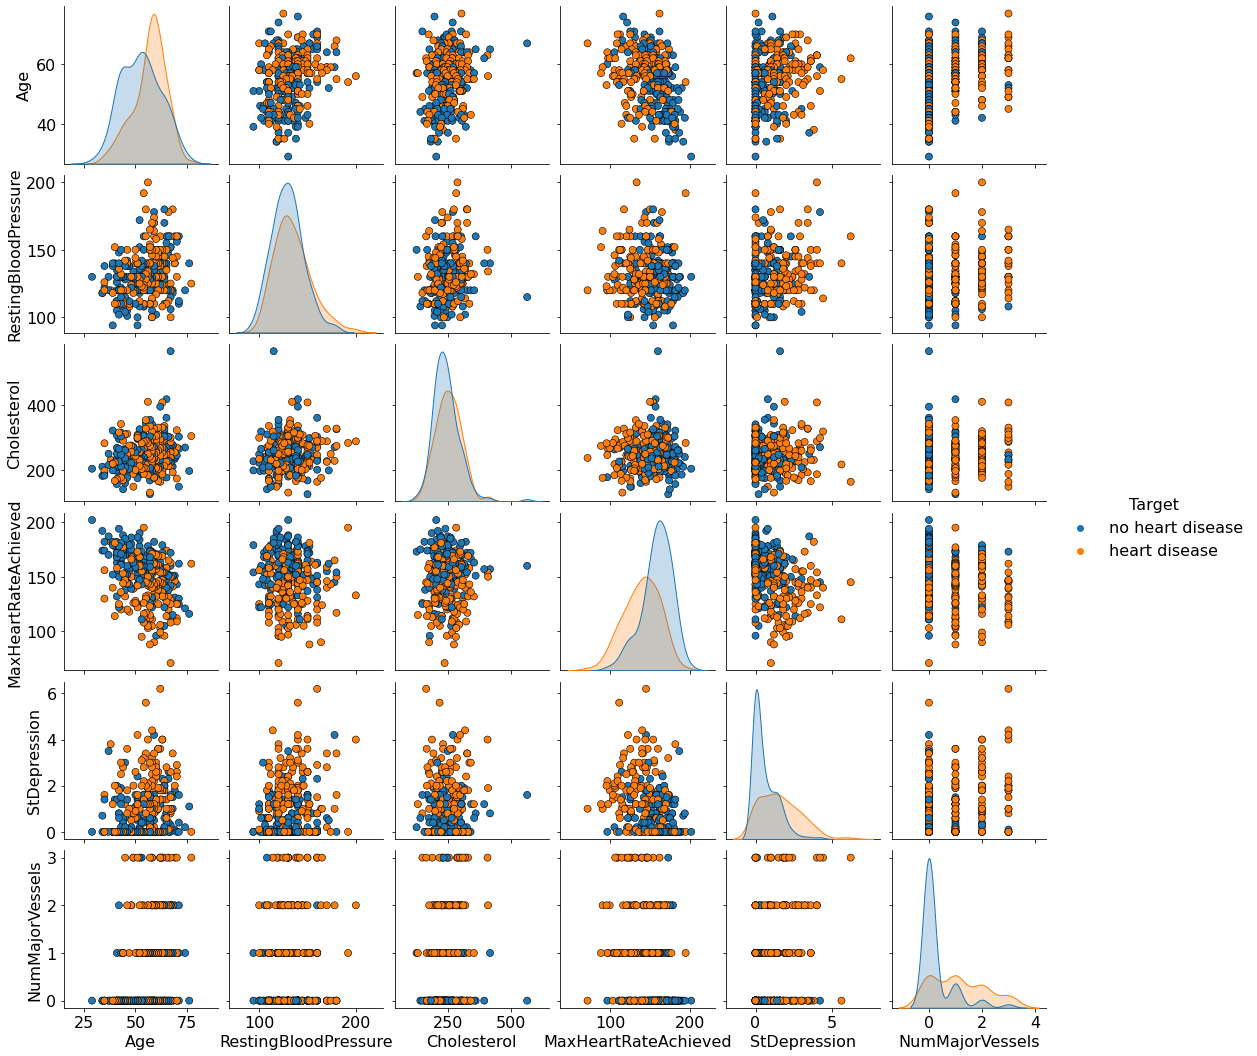

In [15]:
dDataToPlot           = dData2.select_dtypes(include=['number']).copy()
dDataToPlot['Target'] = dData2['Target']

sns.pairplot(dDataToPlot, hue='Target', diag_kind='auto', plot_kws={'s':50, 'edgecolor':'k'})
plt.show()

### Convert non-numeric features to dummy features:

In [16]:
dData3 = pd.get_dummies(dData2, drop_first=True)
dData3

,Age,RestingBloodPressure,Cholesterol,MaxHeartRateAchieved,StDepression,NumMajorVessels,Sex_male,ChestPainType_atypical angina,ChestPainType_non-anginal pain,ChestPainType_typical angina,FastingBloodSugar_lower than 120mg/ml,RestECG_left ventricular hypertrophy,RestECG_normal,ExerciseInducedAngina_yes,StSlope_flat,StSlope_upsloping,Thalassemia_normal,Thalassemia_reversable defect,Target_no heart disease
0,69,160,234,131,0.1,1,1,0,0,0,0,1,0,0,1,0,1,0,1
1,69,140,239,151,1.8,2,0,0,0,0,1,0,1,0,0,1,1,0,1
2,66,150,226,114,2.6,0,0,0,0,0,1,0,1,0,0,0,1,0,1
3,65,138,282,174,1.4,1,1,0,0,0,0,1,0,0,1,0,1,0,0
4,64,110,211,144,1.8,0,1,0,0,0,1,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,152,223,181,0.0,0,1,0,0,1,1,0,1,0,0,1,0,1,0
293,39,118,219,140,1.2,0,1,0,0,1,1,0,1,0,1,0,0,1,0
294,35,120,198,130,1.6,0,1,0,0,1,1,0,1,1,1,0,0,1,0
295,35,138,183,182,1.4,0,0,0,0,1,1,0,1,0,0,1,1,0,1


In [17]:
dData3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    297 non-null    int64  
 1   RestingBloodPressure                   297 non-null    int64  
 2   Cholesterol                            297 non-null    int64  
 3   MaxHeartRateAchieved                   297 non-null    int64  
 4   StDepression                           297 non-null    float64
 5   NumMajorVessels                        297 non-null    int64  
 6   Sex_male                               297 non-null    uint8  
 7   ChestPainType_atypical angina          297 non-null    uint8  
 8   ChestPainType_non-anginal pain         297 non-null    uint8  
 9   ChestPainType_typical angina           297 non-null    uint8  
 10  FastingBloodSugar_lower than 120mg/ml  297 non-null    uint8  
 11  RestEC

### Correlation with SNS:

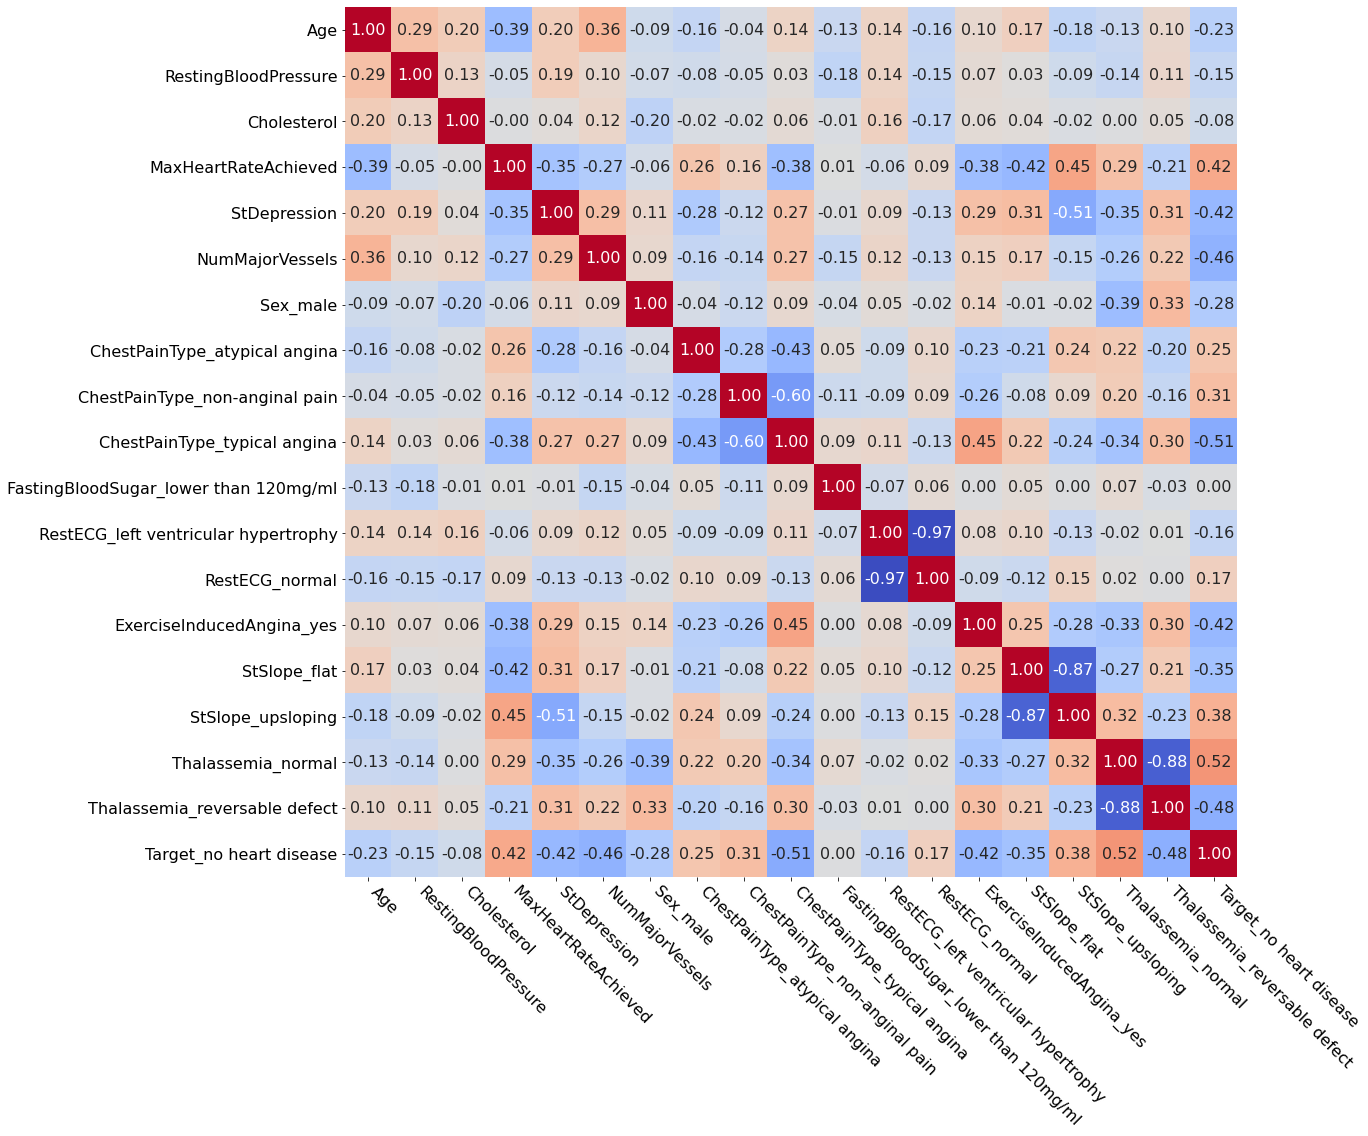

In [18]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(dData3.corr(method='pearson'), annot=True, fmt='.2f', cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha='left')
plt.show()

#### We can examine single features (such as: Rest ECG and Thalassemia)

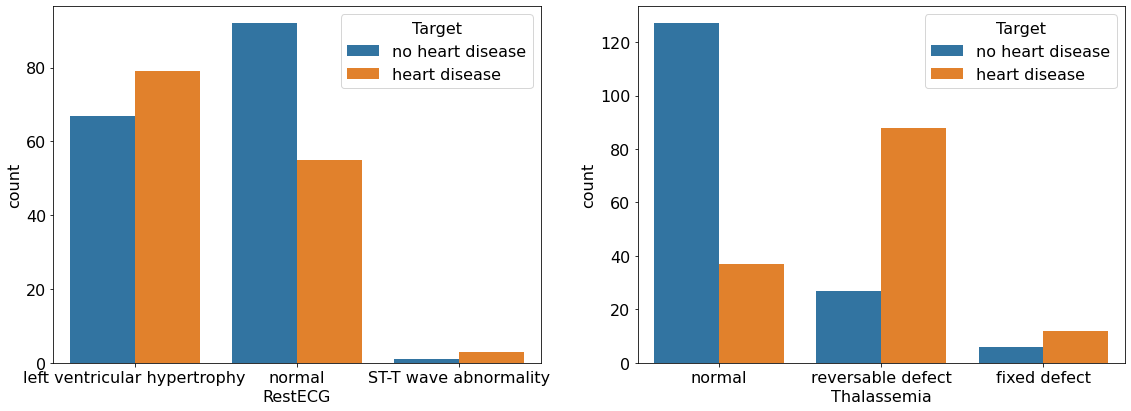

no heart disease    160
heart disease       137
Name: Target, dtype: int64

In [20]:
_, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot   (x='RestECG',     hue='Target', data=dData2, ax=ax[0])
sns.countplot   (x='Thalassemia', hue='Target', data=dData2, ax=ax[1])
plt.tight_layout()
plt.show        ()

dData2['Target'].value_counts()

### Exercise B:
1. Use `dData3` and get above 85% leave-one-out cross validation accuracy.
2. You are allowed you to only 6 features (from the given 18).  
Get more than 80% accuracy with only 6 features.  
What is the right approach for this task?
**Extra:** Get above 85.5% (using only 6 features).

In [19]:
#-- Your solution to 1
???

Object `?` not found.


In [20]:
#-- Your solution to 2
???

Object `?` not found.


In [21]:
dData3.columns

Index(['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRateAchieved',
       'StDepression', 'NumMajorVessels', 'Sex_male',
       'ChestPainType_atypical angina', 'ChestPainType_non-anginal pain',
       'ChestPainType_typical angina', 'FastingBloodSugar_lower than 120mg/ml',
       'RestECG_left ventricular hypertrophy', 'RestECG_normal',
       'ExerciseInducedAngina_yes', 'StSlope_flat', 'StSlope_upsloping',
       'Thalassemia_normal', 'Thalassemia_reversable defect',
       'Target_no heart disease'],
      dtype='object')

In [22]:
#-- Choose 6 features
lCol   = ['Age', 'RestingBloodPressure']
dData4 = dData3[lCol]
dData4

,Age,RestingBloodPressure
0,69,160
1,69,140
2,66,150
3,65,138
4,64,110
...,...,...
292,40,152
293,39,118
294,35,120
295,35,138


In [23]:
???

Object `?` not found.


In [22]:
mX3  = dData3.drop(columns='Target_no heart disease')
mX3 -= mX3.mean(0)
mX3 /= mX3.std(0)
mX3.shape

(297, 18)

### ELI5 (Explain Like I'm Five):
https://eli5.readthedocs.io/en/latest/index.html

In [23]:
import eli5

oLinearSVM = SVC(kernel='linear', C=3).fit(mX3, vY)
eli5.show_weights(oLinearSVM, feature_names=dData3.columns[:-1].tolist(), target_names=['no hearth disease', 'hearth disease'])

Weight?,Feature
+0.954,NumMajorVessels
+0.804,ChestPainType_typical angina
+0.473,Sex_male
+0.427,ChestPainType_atypical angina
+0.321,StDepression
+0.313,RestingBloodPressure
+0.301,Thalassemia_reversable defect
+0.255,StSlope_flat
+0.253,ExerciseInducedAngina_yes
+0.233,FastingBloodSugar_lower than 120mg/ml


### Grid Search:

In [35]:
from sklearn.model_selection import GridSearchCV

dSvmParams = {'kernel': ('linear',),
              'C'     : np.linspace(0.01, 10, 21)}
oSearch    = GridSearchCV(SVC(), dSvmParams, cv=KFold(N, shuffle=True)).fit(mX3, vY)

print(f'Linear best parameters CV score = {oSearch.best_score_}')
print(oSearch.best_params_)

Linear best parameters CV score = 0.8518518518518519
{'C': 3.0069999999999997, 'kernel': 'linear'}


In [39]:
from sklearn.model_selection import GridSearchCV

vσ         = np.linspace(30, 50, 11)
dSvmParams = {'kernel': ('rbf',),
              'C'     : np.linspace(30, 40, 3),
              'gamma' : 1 / (2 * vσ**2)}
oSearch    = GridSearchCV(SVC(), dSvmParams, cv=KFold(N, shuffle=True)).fit(mX3, vY)

print(f'RBF best parameters CV score = {oSearch.best_score_}')
print(oSearch.best_params_)

RBF best parameters CV score = 0.8518518518518519
{'C': 30.0, 'gamma': 0.0002834467120181406, 'kernel': 'rbf'}
